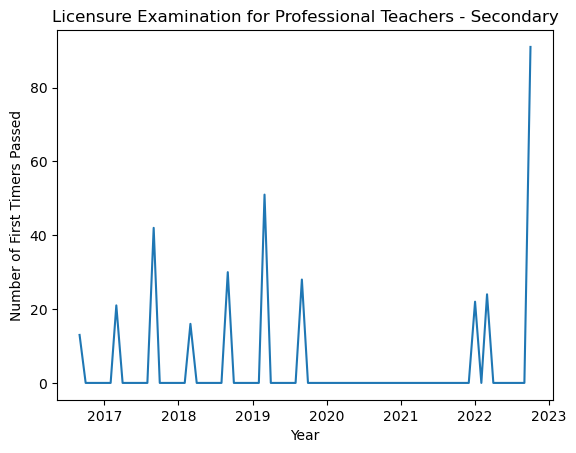

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("FTPassedST.csv")
df["datestring"] = pd.to_datetime(df["datestring"])
df.set_index("datestring", inplace=True)
df = df.resample("MS").sum()
df['First Timers Passed'] = pd.to_numeric(df['First Timers Passed'])


df.isnull().sum()
df.duplicated().sum()

plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Number of First Timers Passed')
plt.title('Licensure Examination for Professional Teachers - Secondary')
plt.show()


ADF Statistic: -1.1710082444805865
p-value: 0.6859412776838022


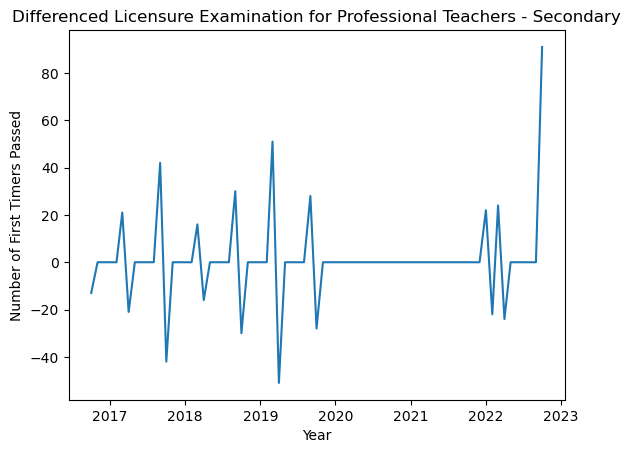

In [49]:
result = sm.tsa.stattools.adfuller(df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

df_diff = df.diff().dropna()

plt.plot(df_diff)
plt.xlabel('Year')
plt.ylabel('Number of First Timers Passed')
plt.title('Differenced Licensure Examination for Professional Teachers - Secondary')
plt.show()

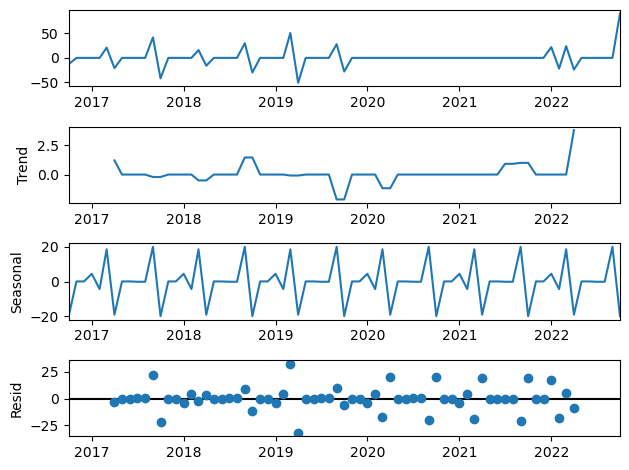

In [63]:
decomposition = sm.tsa.seasonal_decompose(df_diff, model='additive')
fig = decomposition.plot()
plt.show()

D:\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


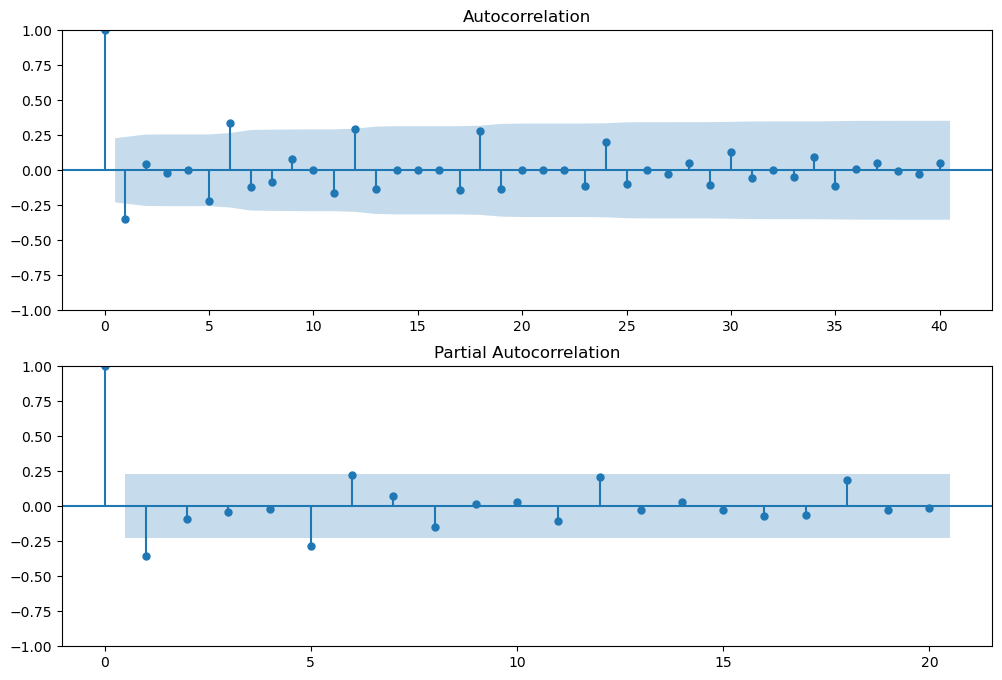

In [89]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff, lags=20, ax=ax2)
plt.show()